# 10주차

### * 모델 평가와 성능 향상
- 지도 학습 모델 평가를 위한 함수 : train_test_split, fit, score
- 두 가지 관점의 평가 방법 : 교차 검증과 score 메서드가 제공하는 정확도와 R의 제곱값이외에 분류와 회귀 성능을 측정하는 다른 방법


#### * 교차 검증
- 안정적이고 뛰어난 통계적 평가 방법
- 데이터를 여러번 반복하여 나누고 여러 모델로 학습


#### - 데이터를 훈련 세트와 테스트 세트로 나누는 이유는 얼마나 잘 일반화되는지 측정하기 위함이다.
#### - 교차 검증의 장점은 데이터 편중과 과적합의 위험에서 벗어나는 것이다.

#### [ 교차 검증 실습]

In [5]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if(platform.system() == 'Darwin'):
    rc('font', family='AppleGothic')
elif(platform.system() == 'Windows'):
    path = 'C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('error')

In [9]:
from sklearn.model_selection import cross_val_score
# 매개변수가 평가하려는 모델과 훈련데이터, 타깃 레이블을 대상으로 한다.

from sklearn.datasets import load_iris
# 분꽃 데이터 로드

from sklearn.linear_model import LogisticRegression
import pandas as pd

# 교차 검증 : 안정적이고 뛰어난 통계적 평가 방법
# k-겹 교차 검증 : k개의 나누어서 교차로 검증하는 방법
# - k의 값이 3에서 5로 변경되어진다. (교재와는 다른 내용)

iris = load_iris()
logreg = LogisticRegression(max_iter=3000)

# cv=3 : 3겹 교차 검증
scores = cross_val_score(logreg, iris.data, iris.target, cv=3) 
print("교차 검증 점수 : ", scores)

교차 검증 점수 :  [0.98 0.96 0.98]


In [10]:
# 5겹 교차 검증
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("교차 검증 점수 : ", scores)

교차 검증 점수 :  [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [11]:
# cv=k 항목 생략이 가능하다.
scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수 : ", scores)

교차 검증 점수 :  [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [12]:
print("교차 검증 평균 점수 : {:.2f}".format(scores.mean()))

교차 검증 평균 점수 : 0.97


In [15]:
from sklearn.model_selection import cross_validate

# cross_val_score와 비슷하다.
# 분할마다 훈련과 테스트에 걸린 시간을 닮은 dic를 반환한다.
res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)

display(res)

{'fit_time': array([0.32821703, 0.44830084, 0.43228674, 0.71047592, 0.98465705]),
 'score_time': array([0.00100231, 0.00300097, 0.00700641, 0.00700355, 0.00199914]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [16]:
res_df = pd.DataFrame(res)
display(res_df)

print("평균 시간과 점수 : \n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.328217,0.001002,0.966667,0.966667
1,0.448301,0.003001,1.000000,0.966667
2,0.432287,0.007006,0.933333,0.983333
3,0.710476,0.007004,0.966667,0.983333
4,0.984657,0.001999,1.000000,0.975000


평균 시간과 점수 : 
 fit_time       0.580788
score_time     0.004002
test_score     0.973333
train_score    0.975000
dtype: float64


In [18]:
# 교차 검증 상세 옵션
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5) 

print("교차 검증 점수 : \n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수 : 
 [1.         1.         0.86666667 0.93333333 0.83333333]


In [22]:
kfold = KFold(n_splits=3) 

print("교차 검증 점수 : \n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수 : 
 [0. 0. 0.]


In [24]:
# 데이터를 섞어서 샘플의 순서를 섞는것
kfold = KFold(n_splits=3, shuffle=True, random_state=0) 

print("교차 검증 점수 : \n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

# => 데이터를 분할하기 전에 섞어주는 것이 결과가 높은 성능

교차 검증 점수 : 
 [0.98 0.96 0.96]


In [25]:
# LOOCV 교차 검증 방법
# -> k-겹 교차와 비슷하지만 작은 데이터셋에서 좋은 결과 가능성이 높다.
#    하지만 데이터셋이 클 경우, 시간이 오래 걸린다는 단점이 있다.
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

print("교차 검증 분할 횟수 : ", len(scores))
print("평균 정확도 : {:.2f}".format(scores.mean()))

교차 검증 분할 횟수 :  150
평균 정확도 : 0.97


# 　

#### * 그리드 서치
- 수많은 매개변수 각각의 모델을 만들고 최적의 매개변수를 찾아주는 함수
- 격자 모양의 매개변수 각각의 조합을 모두 포함하여 탐색한다
- 다양한 모델의 훈련 과정을 자동화하고 사용자에게 교차 검사를 사용해 최적의 값을 제공하는 효율적인 도구
- 지정해준 후보군의 갯수만큼 비례하여 시간이 늘어나기 때문에 최적의 조합을 찾을 때까지 시간이 매우 오래 걸린다는 단점이 있다.


#### - 그리드서치는 다양한 모델의 훈련 과정을 자동화하고 사용자에게 교차 검사를 사용해 최적의 값을 제공하는 효율적인 도구이지만 최적의 조합을 찾을 때까지 시간이 매우 오래 걸린다는 단점이 있다.

#### [ 그리드서치 실습 ]

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print("훈련 세트의 크기 : {}  테스트 세트의 크기 : {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
print("최고 점수 : {:.2f}".format(best_score))
print("최적 매개변수 : ", best_parameters)

훈련 세트의 크기 : 112  테스트 세트의 크기 : 38
최고 점수 : 0.97
최적 매개변수 :  {'C': 100, 'gamma': 0.001}


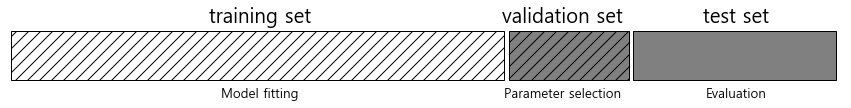

In [27]:
# 평가를 하기 위해서 추가적인 독립적 데이터셋이 필요하다
import mglearn
mglearn.plots.plot_threefold_split()

In [29]:
# 훈련과 테스트 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# 훈련을 훈련과 검증으로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기 : {}  검증 세트의 크기 : {}  테스트 세트의 크기 : {}".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
            
print("최고 점수 : {:.2f}".format(best_score))
print("최적 매개변수 : ", best_parameters)
print("최적 매개변수에서 테스트 세트 점수 : {:.2f}".format(test_score))

# => 탐색적 분석과 모델 선택을 위해서 훈련, 검증 세트 사용을 권한다
# => 평가를 위해서 테스트 세트를 보관하는것이 효율적이다.

훈련 세트의 크기 : 84  검증 세트의 크기 : 28  테스트 세트의 크기 : 38
최고 점수 : 0.96
최적 매개변수 :  {'C': 10, 'gamma': 0.001}
최적 매개변수에서 테스트 세트 점수 : 0.92


In [30]:
from sklearn.model_selection import cross_val_score
import numpy as np

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval)
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

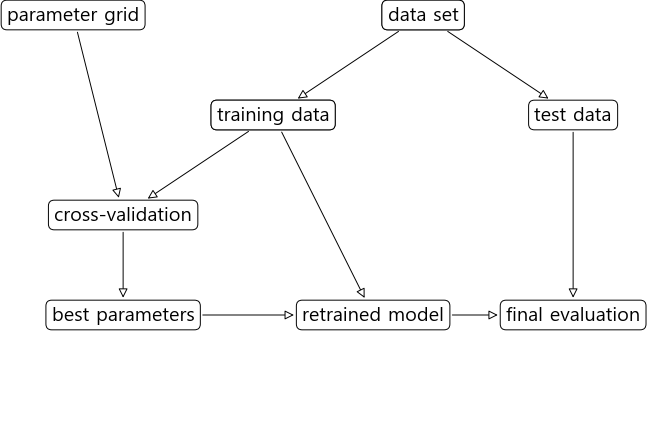

In [31]:
# 데이터를 분할하고 그리드 서치를 적용해서 최종 매개변수를 평가하는 과정
mglearn.plots.plot_grid_search_overview()

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, return_train_score = True)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))
print("최적 매개변수 : ", grid_search.best_params_)
print("최고 교차 검증 점수 : {:.2f}".format(grid_search.best_score_))
print("최고 성능 모델 : ", grid_search.best_estimator_)

테스트 세트 점수: 0.97
최적 매개변수 :  {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수 : 0.97
최고 성능 모델 :  SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [36]:
import pandas as pd

pd.set_option('display.max_columns', None)

results = pd.DataFrame(grid_search.cv_results_)

display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.00480328,0.0136086,0.00960608,0.00400271,0.00780554
std_fit_time,0.0017219,0.014301,0.0107142,0.000632636,0.00147097
mean_score_time,0.00460343,0.00240235,0.0026021,0.00180125,0.00280228
std_score_time,0.00332479,0.00102009,0.000800431,0.00039971,0.000749705
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


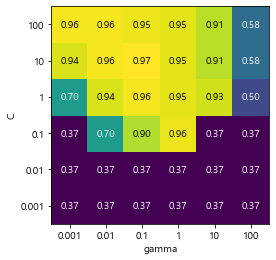

In [37]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                     ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

# 　

### 불균형 데이터셋

#### * 오차 행렬(Confusion Matrix)
- 이진 분류 평가 결과를 나타낼 때 사용하는 방법
- 출력은 2X2 배열
- 행은 정답 클래스, 열은 예측 클래스에 해당
- 각 항목의 숫자는 행에 해당하는 클래스가 얼마나 많이 열에 해당하는 클래스로 분류되었는지 표현
- 대각 행렬 : 정확히 분류된 경우


#### - 평가 지표 선택의 목표에서 모델을 선택하고 매개변수를 조정할 때, 비즈니스 지표에 긍정적인 영향을 주는 선택이 중요하다.
#### - 불균형 데이터셋에서 예측 정확도 99%인 분류기는 정확도만으로 '무조건 클릭 아님' 모델과 '진짜 좋은 모델'을 구분하기 어렵다
#### - 오차 행렬에서 행은 예측 클래스, 열은 정답 클래스에 해당한다.

#### [  평가 지표와 측정(1) 실습 ]

In [39]:
# 불균형 데이터셋

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [40]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print("예측된 레이블 : ",  np.unique(pred_most_frequent))
print("테스트 점수 : {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블 :  [False]
테스트 점수 : 0.90


In [42]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

print("테스트 점수 : {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수 : 0.92


In [44]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수 : {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=3000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수 : {:.2f}".format(dummy.score(X_test, y_test)))

C:\Users\user\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


dummy 점수 : 0.83
logreg 점수 : 0.81


In [45]:
# 오차행렬
# -> 이진 분류 평가 결과를 나타낼 때 사용하는 방법

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬 : \n", confusion)

# 행은 정답 클래스
# 열은 오차 클래스

오차 행렬 : 
 [[402   1]
 [  6  41]]


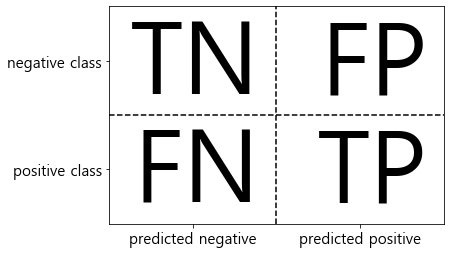

In [46]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

In [47]:
print("빈도 기반 더미 모델 : ")
print(confusion_matrix(y_test, pred_most_frequent))

print("\n\n무작위 더미 모델 : ")
print(confusion_matrix(y_test, pred_dummy))

print("\n\n결정 트리 : ")
print(confusion_matrix(y_test, pred_tree))

print("\n\n로지스틱 회귀 : ")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델 : 
[[403   0]
 [ 47   0]]


무작위 더미 모델 : 
[[368  35]
 [ 42   5]]


결정 트리 : 
[[390  13]
 [ 24  23]]


로지스틱 회귀 : 
[[402   1]
 [  6  41]]


In [48]:
# => 매우 수동적인 방법이나 정성적인 방법이다